# PK/PD AL Model
# Date: 07/15/2025

## First attempt at MLE

<br>

In [24]:
import subprocess
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 
import math

<br>

# ```pmax_artemether``` = 0.9998653531 and ```ec50_lum``` values for 4 genotypes

## AL maximum efficacy: 96.5%, 72.7892066535
## pfcrt K76: 92.5%, 121.5372211838
## pfcrt 76T: 91.9%, 129.4004601323
## pfmdr1 N86: 87.5%, 195.0108555496
## pfmdr1 86Y: 100%, 1.0000000000

<br>

## But before that... Effect vs Log Concentration graph!

In [68]:
# Instantaenous drug effect a

#a = (-1.0/24.0) * log( 1.0 - p->pdparam_Pmax * pow((y[1]/p -> patient_blood_volume),p->pdparam_n) / (pow((y[1]/p -> patient_blood_volume),p->pdparam_n) + pow((p->pdparam_EC50/p -> patient_blood_volume),p->pdparam_n)) );

pmax_lum = 0.9995
ec50_lum = 63000
hill_coefficient_lum = 20
patient_blood_volume = 5.5
concentration_lum_central_compartment = np.linspace(0, 480000, 672)
daily_killing = (-1/24)

#a = daily_killing * np.log(1.0 - pmax_lum * (concentration_lum_central_compartment/patient_blood_volume)**hill_coefficient_lum) / ((concentration_lum_central_compartment/patient_blood_volume)**hill_coefficient_lum + (ec50_lum/patient_blood_volume)**hill_coefficient_lum)

In [69]:
a = np.zeros(len(concentration_lum_central_compartment))
for i in range(len(concentration_lum_central_compartment)):
    if concentration_lum_central_compartment[i] == 0:
        a[i] = 0
    else:
        #a[i] = (-1/24) * math.log((1.0 - pmax_lum * (concentration_lum_central_compartment[i]/patient_blood_volume)**hill_coefficient_lum) / ((concentration_lum_central_compartment[i]/patient_blood_volume)**hill_coefficient_lum + (ec50_lum)**hill_coefficient_lum))
        a[i] = daily_killing * np.log(1 - (pmax_lum * (concentration_lum_central_compartment[i]/patient_blood_volume)**hill_coefficient_lum) / ((concentration_lum_central_compartment[i]/patient_blood_volume)**hill_coefficient_lum + (ec50_lum)**hill_coefficient_lum))
print("a:", a)

a: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00

In [70]:
log_concentration_lum_central_compartment = np.log(concentration_lum_central_compartment + 1e-10)  # Adding a small value to avoid log(0)

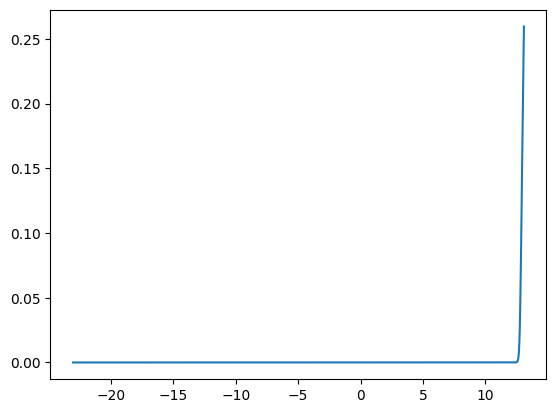

In [71]:
plt.plot(log_concentration_lum_central_compartment, a)

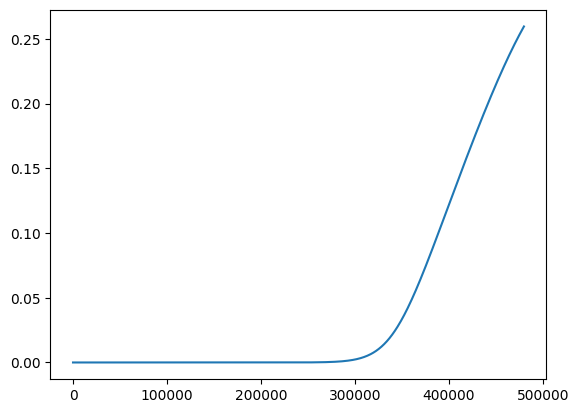

In [72]:
plt.plot(concentration_lum_central_compartment, a)